# Jordan Lesniak

## CMSE 202 Final Project

# 1. Our Problem, and Why It Is Interesting
The problem in our project is to predict the habitable zone radii of stars containing known explanet's. We chose this topic and think it is quite interesting because it is crazy to think about whether other planets in our galaxy or even just space in general could sustain human life. Another reason this topic is interesting is if a planet is possibly habitable, could that mean that some sort of life form is already living on it? This topic is important because what if Earth runs out of resources one day or overpopulates? There would have to be some sort of plan in place to make the human species last and it could quite possibly be moving select people (or everyone possibly) to another planet that can sustain human life.

# 2. Data and Background
http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database
This shows all of the current known exoplanets as of Decemeber 5th 2019, there are a lot of columns for the data. It comes from a reliable source so the data should be very accurate for the date that it came out on.

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
planets = pd.read_csv('phl_exoplanet_catalog.csv', usecols = (0,1,2,5,8,10,13,16,19,28,32,36,37,38,40,41,42,43,44,45,51,54,56,57,58,59,61,62,70,71,73,74,76,77,83,84,85,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,103,104,105,109,110,111))
# obviously as you can tell there were so many columns we just went through and chose the ones we thought we would need
planets.dropna(subset=['P_TYPE_TEMP']) # dropped the NA's in the P_TYPE_TEMP column to make things easier
pd.set_option('display.max_columns', None) #displays all columns
planets.head(10)

,P_NAME,P_STATUS,P_MASS,P_RADIUS,P_YEAR,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,P_ANGULAR_DISTANCE,P_TEMP_MEASURED,P_DETECTION,P_DETECTION_MASS,P_DETECTION_RADIUS,P_ATMOSPHERE,S_NAME,S_RA,S_DEC,S_MAG,S_DISTANCE,S_MASS,S_RADIUS,S_RADIUS_ERROR_MAX,S_TYPE,S_AGE,S_AGE_ERROR_MIN,S_TEMPERATURE,S_TEMPERATURE_ERROR_MIN,P_GRAVITY,P_DENSITY,P_DISTANCE,P_PERIASTRON,P_DISTANCE_EFF,P_FLUX,P_TYPE,S_RADIUS_EST,S_TYPE_TEMP,S_RA_T,S_DEC_T,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,NaN,2007,326.03000,1.290,0.231,NaN,13.80,NaN,Radial Velocity,NaN,NaN,NaN,11 Com,185.17928,17.792868,4.740,93.37,2.70,19.00,2.00,K0 III,NaN,NaN,4742.0,-100.0,NaN,NaN,1.324418,0.99201,1.298759,101.011410,Jovian,19.00,K,12 20 43.0286,+17 47 34.3248,163.546800,10.132812,24.763411,12.834754,23.477907,13.586847,23.477907,12.390643,23.477907,34.529063,0.642400,0,0,Hot,0,0.083813,12.082709,6165.86330,1.290
1,11 UMi b,3.0,4684.78480,NaN,2009,516.21997,1.530,0.080,NaN,12.20,NaN,Radial Velocity,NaN,NaN,NaN,11 UMi,229.27454,71.823898,5.016,125.72,2.78,29.79,2.84,K4 III,NaN,NaN,4213.0,-46.0,NaN,NaN,1.534896,1.40760,1.531227,107.351180,Jovian,29.79,K,15 17 05.8915,+71 49 26.0328,250.492940,12.770059,31.984271,16.175280,30.323783,17.134143,30.323783,15.615215,30.323783,42.732816,0.648683,0,0,Hot,0,0.082414,12.229641,4684.78480,1.530
2,14 And b,3.0,1525.57440,NaN,2008,185.84000,0.830,0.000,NaN,11.00,NaN,Radial Velocity,NaN,NaN,NaN,14 And,352.82257,39.236198,5.227,75.59,2.20,11.00,1.00,G8 III,NaN,NaN,4813.0,-20.0,NaN,NaN,0.830000,0.83000,0.830000,84.446427,Jovian,11.00,G,23 31 17.4215,+39 14 10.3128,58.175144,6.025230,14.680087,7.631867,13.918028,8.078404,13.918028,7.367780,13.918028,20.593611,0.600010,0,0,Hot,0,0.081917,12.848516,1525.57440,0.830
3,14 Her b,3.0,1481.07850,NaN,2002,1773.40000,2.930,0.370,NaN,163.00,NaN,Radial Velocity,NaN,NaN,NaN,14 Her,242.60130,43.817646,6.610,17.94,0.90,0.93,0.01,K0 V,NaN,NaN,5338.0,-25.0,NaN,NaN,3.130558,1.84590,2.982550,0.078887,Jovian,0.93,K,16 10 24.3158,+43 49 03.5256,0.629171,0.610595,1.457913,0.773404,1.382234,0.818179,1.382234,0.746615,1.382234,2.141648,0.445415,0,0,Cold,0,0.145241,12.865261,1481.07850,2.930
4,16 Cyg B b,3.0,565.73385,NaN,1996,798.50000,1.660,0.680,NaN,78.50,NaN,Radial Velocity,NaN,NaN,NaN,16 Cyg B,295.46655,50.517525,6.250,21.15,1.08,1.13,0.01,G2.5 V,NaN,NaN,5750.0,-8.0,NaN,NaN,2.043792,0.53120,1.774870,0.618972,Jovian,1.13,G,19 41 51.9764,+50 31 03.0900,1.250596,0.840657,1.982050,1.064798,1.879164,1.125991,1.879164,1.027861,1.879164,3.019411,0.473325,1,1,Warm,0,0.368627,13.421749,565.73385,1.660
5,18 Del b,3.0,3273.62840,NaN,2008,993.30000,2.600,0.080,NaN,34.00,NaN,Radial Velocity,NaN,NaN,NaN,18 Del,314.60806,10.839286,5.506,76.38,2.30,8.50,NaN,G6 III,NaN,NaN,4979.0,-18.0,NaN,NaN,2.608320,2.39200,2.602085,5.903948,Jovian,8.50,G,20 58 25.9391,+10 50 21.4296,39.782769,4.945269,11.966497,6.263916,11.345312,6.629143,11.345312,6.047127,11.345312,17.029868,0.608967,0,0,Hot,0,0.216174,12.424038,3273.62840,2.600
6,1RXS J160929.1-210524 b,3.0,2542.62400,NaN,2008,NaN,330.000,NaN,NaN,2280.00,NaN,Imaging,NaN,NaN,NaN,1RXS J160929.1-210524,242.37627,-21.083036,NaN,145.00,0.85,NaN,NaN,K7 V,0.005,NaN,4060.0,-200.0,NaN,NaN,330.000000,330.00000,330.000010,NaN,Jovian,NaN,K,16 09 30.3074,-21 04 58.9296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140128,0,0,NaN,0,NaN,12.562950,2542.62400,330.000
7,24 Boo b,3.0,289.22348,NaN,2018,30.35060,0.190,0.042,NaN,1.97,NaN,Radial Velocity,NaN,NaN,NaN,24 Boo,217.15755,49.844852,5.580,96.25,0.99,10.64,0.84,G3 IV,6.920,-2.75,4893.0,-15.0,NaN,NaN,0.190168,0.18202,0.190042,1611.940300,Jovian,10.64,G,14 28 37.8140,+49 50 41.4672,58.139697,6.002133,14.574833,7.602601,13.818243,8.046676,13.818243,7.339509,13.818243,20.587336,0.492177,0,0,Hot,0,0.065685,13.823874,289.2

In [2]:
# this is showing how many different types of exoplanets there are
p_type = planets['P_TYPE']
p_type.unique() 

array(['Jovian', nan, 'Superterran', 'Neptunian', 'Subterran', 'Terran',
       'Miniterran'], dtype=object)

In [3]:
ME = 1 #mass of the earth in Kg in an order of magnitude
mass = planets['P_MASS'] #mass of planets in terms of earths mass
p_type = planets['P_TYPE'] # type of each planet
mini = []
sub = []
terran = []
super_ = []
nep = []
jup = []
no_data1 = []
# for loop to find which type of exoplanet each exoplanet is
for i in range(len(planets)):
    x = p_type[i]
    if x == 'Miniterran':
        mini.append(1)
    elif x == 'Subterran':
        sub.append(1)
    elif x == 'Terran':
        terran.append(1)
    elif x == 'Superterran':
        super_.append(1)
    elif x == 'Neptunian':
        nep.append(1)
    elif x == 'Jovian':
        jup.append(1)
    elif x == 'nan':
        no_data1.append(1)

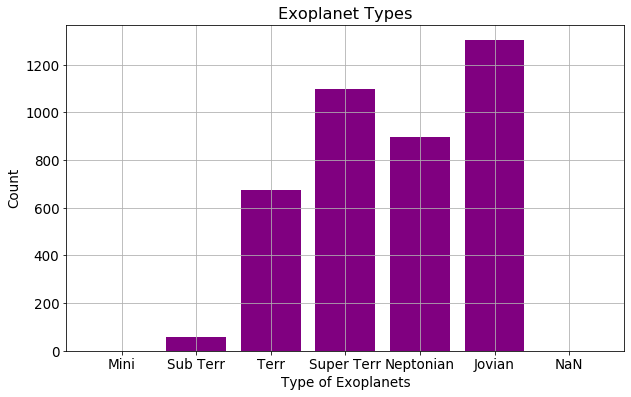

In [4]:
# this graph shows the exact number of each type of exoplanet
# Just gives some background as to the type of data we are working with and what types of planets are in the datset
plt.rcParams.update({'font.size': 13.5})
plt.figure(figsize=(10,6))
mass = planets['P_MASS'] #mass of the planets in terms of Earths mass
p_type = planets['P_TYPE'] #type of the planets, types listed on below
xlab = ['Mini','Sub Terr','Terr','Super Terr','Neptonian','Jovian','NaN']
x_pos = np.arange(len(xlab))
score = [len(mini),len(sub),len(terran),len(super_),len(nep),len(jup),len(no_data1)]
plt.bar(x_pos,score,color='purple')
plt.xticks(x_pos,xlab)
plt.title('Exoplanet Types')
plt.xlabel('Type of Exoplanets')
plt.ylabel('Count')
plt.grid()

We know that the exoplanets Jovian and Neptonian would not be able to sustain human life because there is no surface of these types of planets. (So maybe it could support a species that floats). Therefore the only types of exoplanets that could sustain human life from this graph are super terranian, terranian, and sub terranian.

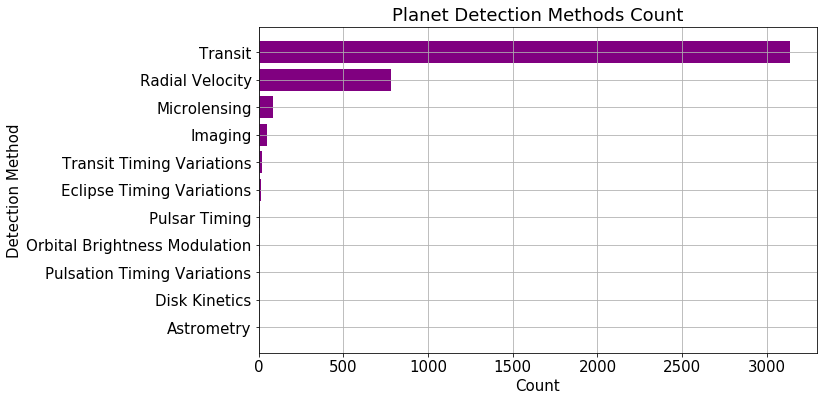

In [5]:
# this graph shows the method of which each exoplanet was discovered by and the number of times the method has been used
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,6))
method = planets['P_DETECTION']
ylab= ['Astrometry','Disk Kinetics','Pulsation Timing Variations','Orbital Brightness Modulation','Pulsar Timing','Eclipse Timing Variations','Transit Timing Variations','Imaging','Microlensing','Radial Velocity','Transit']
y_pos = np.arange(len(ylab))
scores = [1,1,2,6,7,15,19,47,86,783,3136]
plt.barh(y_pos,scores,color='purple')
plt.yticks(y_pos,ylab)
plt.title('Planet Detection Methods Count')
plt.xlabel('Count')
plt.ylabel('Detection Method')
plt.grid()

According to the graph, a majority of exoplanets are detected by the transit method and sometimes detected by the radial velocity method. It also shows that the planets are rarely detected using anything other than these 2 methods, which may lead to some systematics within the data that we will have to address later when accessing more of the data

# 3. What kind of model are you going to develop?

For our model we are taking two different methods for calculating The luminosity of a star, then we will be plugging in these luminosities into our equation for finding the inner and outer radii of the Habitable Zone of a Star.

## 3.1 Our Model

In [6]:
# this cell will be used to calculate the habitable zones of stars from .1 radius sun up to 10 radius sun so I can plot solar
## Luminosity vs radius of orbit and make a model of the habitable zone based on luminosity of the star and how the orbit needed to maintain
## the habitable zone will change


r_in_test = []
r_out_test = []
lum_sun = 1 #units of the suns luminosity so the base is set to 1
for i in range(1000):
    x = (.1+(i*.01))
    r_in_val = np.sqrt((x*lum_sun)/1.1)
    r_in_test.append(r_in_val)
    
    r_out_val = np.sqrt(((.1+(i*.01))*lum_sun)/0.53)
    r_out_test.append(r_out_val)
    
print("The Inner Habitable Zone radius for a star of .1 times the luminosity of the sun is",min(r_in_test),'AU. The Outer Habitable Zone radius is',min(r_out_test))    
print("The Inner Habitable Zone radius for a star of 10 times the luminosity of the sun is",max(r_in_test),'AU. The Outer Habitable Zone radius is',max(r_out_test))  
len(r_in_test) #Amount of samples in the Model

The Inner Habitable Zone radius for a star of .1 times the luminosity of the sun is 0.30151134457776363 AU. The Outer Habitable Zone radius is 0.4343722427630694
The Inner Habitable Zone radius for a star of 10 times the luminosity of the sun is 3.0286510648681984 AU. The Outer Habitable Zone radius is 4.363225395170023


1000

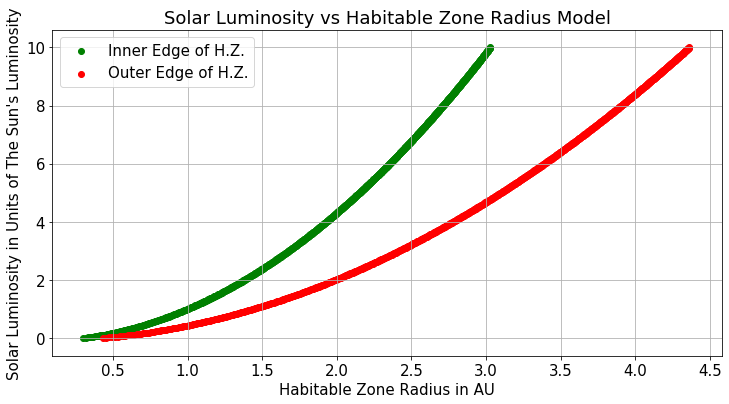

In [7]:
#this cell will used for making the plot of modeling how the habitable zone of a star moves depending on the luminosity of the star
plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size': 15})
orbit_rad = np.linspace(0,10,1000)
plt.scatter(r_in_test,orbit_rad, color = 'green',label = 'Inner Edge of H.Z.')
plt.scatter(r_out_test,orbit_rad, color = 'red', label = 'Outer Edge of H.Z.')
plt.xlabel('Habitable Zone Radius in AU')
plt.ylabel("Solar Luminosity in Units of The Sun's Luminosity")
plt.title('Solar Luminosity vs Habitable Zone Radius Model')
plt.legend()
plt.grid()

# 4. How will you test your model?
We are going to be using two different methods to test our model. The first mehod involves a set of equations being from https://www.planetarybiology.com/calculating_habitable_zone.html, 
which works to find the luminosity of a star, based off of its apparent magnitude, distance from Earth, Steller Classification, and bolometric magnitude. The second Method is from https://www.astro.princeton.edu/~gk/A403/constants.pdf, Here we use the definition of Luminosity, L = 4 * pi * R^2 * sigma * T^4, where sigma is the Boltzmann constant, R is the radius of the star, and T is the surface temperarture of the star to find the luminosity. After finding the luminosity under this definition we will be plugging in this value to solve for the inner and outer edges of the Habitable Zones.

## 4.1 Method 1 (Planetary Biology)

In [9]:
#Equations for calculating the inner and outer rings of the habitable zone Method 1: calculating luminosity of the stars
# using the apparent magnitude given in the datasets
dist = planets['P_DISTANCE'] #Planet's Mean Distance from host star in AU
app_mag = planets['S_MAG'] # apparent magnitude of stars
distance = planets['S_DISTANCE'] # stars distance from Earth in parsecs

abs_mag = []
for i in range(len(planets)): #calculates the absolute magnitude of the stars, using the distance and apparent magnitude
    vals = app_mag[i] - 5*np.log10(distance[i]/10)
    abs_mag.append(vals)
    
BC_vals= []
s_type = planets['S_TYPE'] # This is the spectral type of every star in the data set
for i in range(len(planets)): # calculating general bolometric correction values based off the spectral class 
    if s_type[i] == 'B':
        BC_vals.append(-2.0)
    elif s_type[i] == 'A':
        BC_vals.append(-0.3)
    elif s_type[i] == 'F':
        BC_vals.append(-0.15)
    elif s_type[i] == 'G':
        BC_vals.append(-0.4)
    elif s_type[i] == 'K':
        BC_vals.append(-0.8)    
    elif s_type[i] == 'M':
        BC_vals.append(-2.0)  
    else:
        BC_vals.append('nan')

bol_mag = []      
for i in range(len(abs_mag)): #Calculates the bolometric magnitude of the stars, using Bolometric Correction Constants, while checking for NaN's
    if abs_mag[i] == 'nan':
        pass
    elif BC_vals[i] == 'nan':
        pass
    else:
        m_bol = abs_mag[i] + BC_vals[i]
        bol_mag.append(m_bol)
    
L_star_over_L_sun = []
m_bol_sun = 4.72
for i in range(len(bol_mag)):  #calculates absolute luminosity of the stars
    newval = 10**((bol_mag[i] - m_bol_sun)/-2.5)
    L_star_over_L_sun.append(newval)

r_in = []
for i in range(len(L_star_over_L_sun)):  #calculates inner radius of habitable zone in AU
    r_inner = np.sqrt(L_star_over_L_sun[i]/1.1)
    r_in.append(r_inner)
   
    
r_out = []    
for i in range(len(L_star_over_L_sun)):  #calculates outer radius of habitable zone in AU
    r_outer = np.sqrt(L_star_over_L_sun[i]/0.53)
    r_out.append(r_outer)
    

new_dist = []
for i in range(len(abs_mag)):  #calculates the distances thatll be used later, the distances that specifically relate to the planets that have a bolometric magnitude
    if abs_mag[i] == 'nan':
        pass
    elif BC_vals[i] == 'nan':
        pass
    else:
        new_dist.append(dist[i])

In [10]:
dist = planets['P_DISTANCE']
habitable = []
not_habitable = []
habitable_dist_AU = []
lum_suns_habitable = []
for i in range(len(r_in)):    #This loop determines whether or not every planet that we were able to calculate a luminosity for 
    x = planets['P_NAME'][i]  #falls within its host stars habitable zone
    if new_dist[i] >= r_in[i] and new_dist[i] <= r_out[i]:
        habitable.append(x)
        habitable_dist_AU.append(round(new_dist[i],3))
        lum_suns_habitable.append(L_star_over_L_sun[i])
    else:
        not_habitable.append(x)

## 4.2 Method 2 (Princeton)

In [11]:
suns_radius_meters = 6.96 * 10**8 # suns radius in Meters
star_rad = planets['S_RADIUS'] # stars radius in Solar Units
star_rad_meters = star_rad * suns_radius_meters # stars radius's converted to Meters
star_temp_eff = planets['S_TEMPERATURE'] #stars effective temperatures in Kelvin
sigma = 5.67*10**(-8) # Boltzmann Constant used in solving luminosity  W * m^-2 * K^-4
L_sun = 3.827 * 10**26 #Luminosity of the sun in Watts

L_star = []
new_dist2 = []
for i in range(len(planets)):
    
    x = math.isnan(star_temp_eff[i]) #Finds any NAN values in the variables
    y = math.isnan(star_rad[i])
    if x == True:
        pass
    elif y == True:
        pass
    else:
        #                           M^2                W * M^-2 * K^-4         K^4  
        lumin = (4 * np.pi * (star_rad_meters[i])**2 *      sigma *     (star_temp_eff[i])**4)/L_sun
        L_star.append(lumin)
        new_dist2.append(dist[i]) #new list of distances that exactly correlate to the good values


r_in2 = []
for i in range(len(L_star)):  #calculates in radius of habitable zone in AU
    r_inner2 = np.sqrt(L_star[i]/1.1)
    r_in2.append(r_inner2)
   
    
r_out2 = []    
for i in range(len(L_star)):  #calculates outer radius of habitable zone in AU
    r_outer2 = np.sqrt(L_star[i]/0.53)
    r_out2.append(r_outer2)
            
        
dist = planets['P_DISTANCE']  #calculates whether or not a planet is inside of its host stars habitable zone
habitable2 = []
not_habitable2 = []
habitable_dist_AU2 = []
lum_suns_habitable2 = []
lum_suns_nothabitable2 = []
not_habitable_dist2 = []
for i in range(len(r_in2)):
    x = planets['P_NAME'][i]
    if new_dist2[i] >= r_in2[i] and new_dist2[i] <= r_out2[i]:
        habitable2.append(x)
        habitable_dist_AU2.append(round(new_dist2[i],3))
        lum_suns_habitable2.append(L_star[i])
    else:
        not_habitable2.append(x)
        lum_suns_nothabitable2.append(L_star[i])
        not_habitable_dist2.append(round(new_dist2[i],3))

# 5. Providing the results.

## 5.1 Testing Results for Habitable Exoplanets From Method One in Our Model

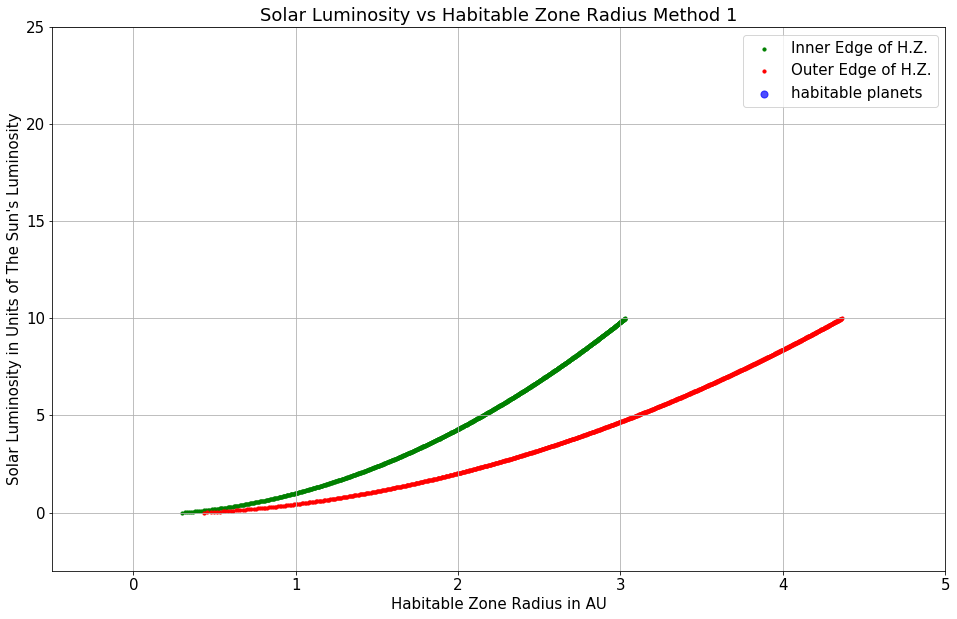

In [12]:
#This graph shows our model in use, while including the data from the habitable planets we found from method 1 in a way to test
#our model to show an eye test of how accurate each method was at predicting habitable zones of the stars

plt.figure(figsize = (16,10))
plt.rcParams.update({'font.size': 15})
plt.scatter(r_in_test,orbit_rad, color = 'green',label = 'Inner Edge of H.Z.',s=10)
plt.scatter(r_out_test,orbit_rad, color = 'red', label = 'Outer Edge of H.Z.',s=10)
plt.scatter(habitable_dist_AU,lum_suns_habitable, color = 'blue', label = 'habitable planets', alpha = 0.7,s=50)
plt.xlabel('Habitable Zone Radius in AU') #Astronomical Uniits, The Earth is 1 Astronomical Unit from the Sun
plt.ylabel("Solar Luminosity in Units of The Sun's Luminosity")
plt.title('Solar Luminosity vs Habitable Zone Radius Method 1')
plt.legend()
plt.xlim(-0.5,5)
plt.ylim(-3,25)
plt.grid()

## 5.2 Testing Results for Habitable Exoplanets From Method Two in Our Model

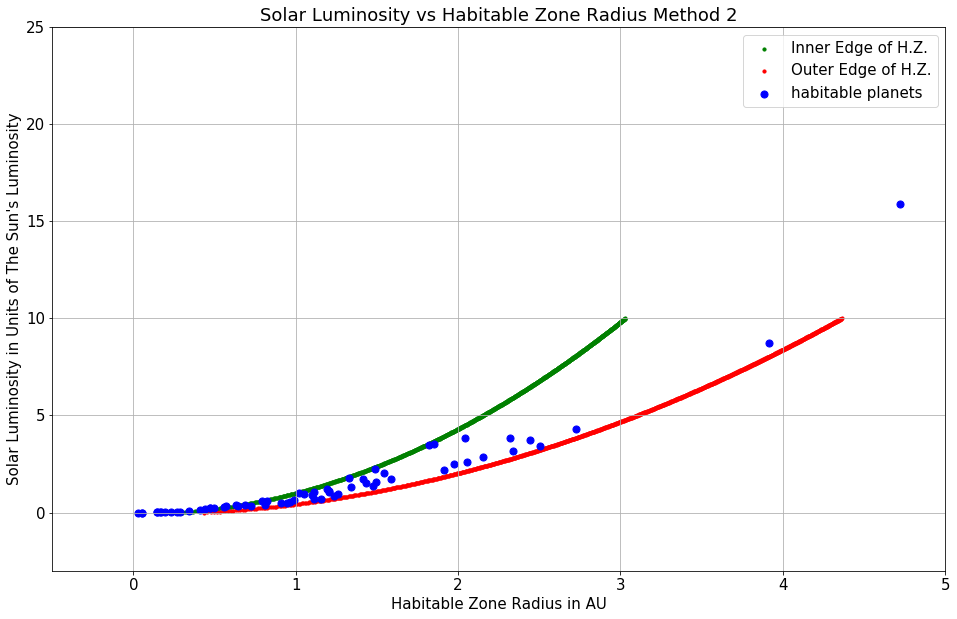

In [13]:
#This graph shows our model in use, while including the data from the habitable planets we found from method 2 in a way to test
#our model to show an eye test of how accurate each method was at predicting habitable zones of the stars

plt.figure(figsize = (16,10))
plt.rcParams.update({'font.size': 15})
plt.scatter(r_in_test,orbit_rad, color = 'green',label = 'Inner Edge of H.Z.',s=10)
plt.scatter(r_out_test,orbit_rad, color = 'red', label = 'Outer Edge of H.Z.',s=10)
plt.scatter(habitable_dist_AU2,lum_suns_habitable2, color = 'blue', label = 'habitable planets', alpha = 1,s=50)
plt.xlabel('Habitable Zone Radius in AU') #Astronomical Uniits, The Earth is 1 Astronomical Unit from the Sun
plt.ylabel("Solar Luminosity in Units of The Sun's Luminosity")
plt.title('Solar Luminosity vs Habitable Zone Radius Method 2')
plt.legend()
plt.xlim(-0.5,5)
plt.ylim(-3,25)
plt.grid()

## 5.3 Testing Results for Habitable and Non Habitable Exoplanets From Method Two

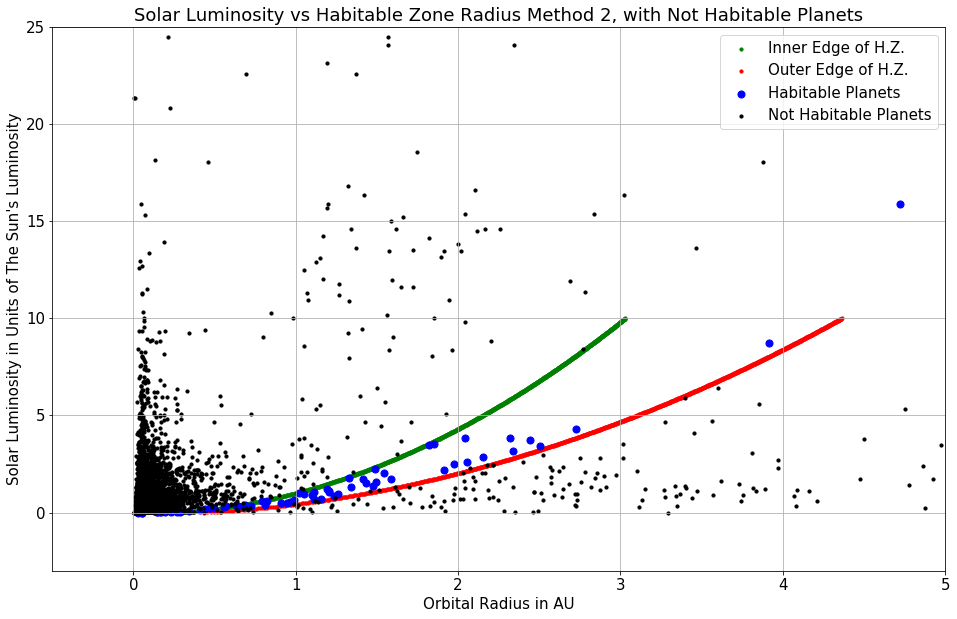

In [14]:
hab_planets = planets['P_HABITABLE']
hab_planets.unique()
hab_planet_index = []
real_dist = []
hab_planet_names = []
for i in range(len(planets)): #This looks through the given data on whether or not an exoplanet is habitable or not, so we can 
                              # compare the 'habitable' exoplanets from the given data to the planets that we found to be habitable
                              # through our own methods
    if hab_planets[i] == 1 or hab_planets[i] == 2:
        hab_planet_index.append(i)
        real_dist.append(dist[i])
        hab_planet_names.append(planets['P_NAME'][i])
        


plt.figure(figsize = (16,10))
plt.rcParams.update({'font.size': 15})
plt.scatter(r_in_test,orbit_rad, color = 'green',label = 'Inner Edge of H.Z.',s=10)
plt.scatter(r_out_test,orbit_rad, color = 'red', label = 'Outer Edge of H.Z.',s=10)
plt.scatter(habitable_dist_AU2,lum_suns_habitable2, color = 'blue', label = 'Habitable Planets', alpha = 1,s=50)
plt.scatter(not_habitable_dist2,lum_suns_nothabitable2, color = 'black', label = 'Not Habitable Planets',s=10)
plt.xlabel('Orbital Radius in AU') #Astronomical Uniits, The Earth is 1 Astronomical Unit from the Sun
plt.ylabel("Solar Luminosity in Units of The Sun's Luminosity")
plt.title('Solar Luminosity vs Habitable Zone Radius Method 2, with Not Habitable Planets')
plt.legend()
plt.xlim(-0.5,5)
plt.ylim(-3,25)
plt.grid()

# 6. Our Conclusions


In [15]:
#Here I will be checking the accurary of both of the methods I used above to test my model, using the Mean Squared Error
# I will be testing the accuracy of my inner Habitable zone radii and outer Habitable zone radii from both methods.

data_opt_min = planets['S_HZ_OPT_MIN']
data_opt_max = planets['S_HZ_OPT_MAX']
data_con_min = planets['S_HZ_CON_MIN']
data_con_max = planets['S_HZ_CON_MAX']

r_in_opt2 = []
r_out_opt2 = []
r_in_con2= []
r_out_con2 = []
for i in range(len(planets)):        #finds the inner and outer habitable zone radii of stars where there are actual values
    w = math.isnan(data_opt_min[i])  #from the given data, takes out NAN values, We will be using these lists to compare results
    x = math.isnan(data_opt_max[i])  #from method 2
    y = math.isnan(data_con_min[i])
    z = math.isnan(data_con_max[i])
    x1 = math.isnan(star_temp_eff[i])
    y1 = math.isnan(star_rad[i])
    
    if w == True:
        pass
    elif x == True:
        pass
    elif y == True:
        pass
    elif z == True:
        pass
    elif x1 == True:
        pass
    elif y1 == True:
        pass
    else:
        r_in_opt2.append(data_opt_min[i]) 
        r_out_opt2.append(data_opt_max[i]) 
        r_in_con2.append(data_con_min[i])
        r_out_con2.append(data_con_max[i])
    
    
r_in_opt = []
r_out_opt = []
r_in_con = []
r_out_con = []
r_in_new = []
r_out_new = []
for i in range(len(planets)):  #finds the inner and outer habitable zone radii of stars where there are actual values
                               #from the given data. We will be using these lists to compare results from method 1
    if abs_mag[i] == 'nan':
        pass
    elif BC_vals[i] == 'nan':
        pass
    else:
        r_in_opt.append(data_opt_min[i]) 
        r_out_opt.append(data_opt_max[i]) 
        r_in_con.append(data_con_min[i])
        r_out_con.append(data_con_max[i])

r_in_no_nan = []
r_out_no_nan = []
r_in_opt_no_nan = []
r_out_opt_no_nan = []
r_in_con_no_nan = []
r_out_con_no_nan = []
for i in range(len(r_in_opt)): #This loop ensures there are no more NaN values in any of the lists for the habitable zones so
    w = math.isnan(r_out[i])   #That when we go to use the Mean Squared Error, we will not get an error when comparing the real
    x = math.isnan(r_in[i])    #data to the results from method 1
    y = math.isnan(r_in_opt[i])
    
    if w == True:
        pass
    elif x == True:
        pass
    elif y == True:
        pass
    else:
        r_in_no_nan.append(r_in[i])
        r_out_no_nan.append(r_out[i])
        r_in_opt_no_nan.append(r_in_opt[i])
        r_out_opt_no_nan.append(r_out_opt[i])
        r_in_con_no_nan.append(r_in_con[i])
        r_out_con_no_nan.append(r_out_con[i])

In [16]:
print('The Mean Squared Error for the optimistic inner Habitable Zone Radius using method 1 is',round(mean_squared_error(r_in_opt_no_nan,r_in_no_nan),4),'Using Method 2 the Mean Squared Error becomes',round(mean_squared_error(r_in_opt2,r_in2),4))
print('The Mean Squared Error for the conservative inner Habitable Zone Radius using method 1 is',round(mean_squared_error(r_in_con_no_nan,r_in_no_nan),4),'Using Method 2 the Mean Sqaured Error becomes',round(mean_squared_error(r_in_con2,r_in2),4))
print('The Mean Squared Error for the optimistic outer Habitable Zone Radius using method 1 is',round(mean_squared_error(r_out_opt_no_nan,r_out_no_nan),4),'Using Method 2 the Mean Sqaured Error becomes',round(mean_squared_error(r_out_opt2,r_out2),4))
print('The Mean Squared Error for the conservative outer Habitable Zone Radius using method 1 is',round(mean_squared_error(r_out_con_no_nan,r_out_no_nan),4),'Using Method 2 the Mean Sqaured Error becomes',round(mean_squared_error(r_out_con2,r_out2),4))       

The Mean Squared Error for the optimistic inner Habitable Zone Radius using method 1 is 0.2843 Using Method 2 the Mean Squared Error becomes 0.1686
The Mean Squared Error for the conservative inner Habitable Zone Radius using method 1 is 0.2198 Using Method 2 the Mean Sqaured Error becomes 0.0187
The Mean Squared Error for the optimistic outer Habitable Zone Radius using method 1 is 0.9341 Using Method 2 the Mean Sqaured Error becomes 1.9411
The Mean Squared Error for the conservative outer Habitable Zone Radius using method 1 is 0.7446 Using Method 2 the Mean Sqaured Error becomes 1.3297


The following numbers are all of the Calculated Mean Squared Error values for our data on the radii of the habitable zones, we are using the data that was presented in our data set to be the correct the value for every radii. In the Data set they give two different values for the inner radii and the outer radii. One of them is the optimistic value of the radius of the habitable zone and the other is the conservative value of the radius of the Habitable zone. Next to the numbers below I will be individually labeling which is the optimistic value and which is the conservative value

In [17]:
print('The Mean Squared Error for the optimistic inner Habitable Zone Radius using method 1 is',round(mean_squared_error(r_in_opt_no_nan,r_in_no_nan),4),'Using Method 2 the Mean Squared Error becomes',round(mean_squared_error(r_in_opt2,r_in2),4))
print('The Mean Squared Error for the conservative inner Habitable Zone Radius using method 1 is',round(mean_squared_error(r_in_con_no_nan,r_in_no_nan),4),'Using Method 2 the Mean Sqaured Error becomes',round(mean_squared_error(r_in_con2,r_in2),4))
print('The Mean Squared Error for the optimistic outer Habitable Zone Radius using method 1 is',round(mean_squared_error(r_out_opt_no_nan,r_out_no_nan),4),'Using Method 2 the Mean Sqaured Error becomes',round(mean_squared_error(r_out_opt2,r_out2),4))
print('The Mean Squared Error for the conservative outer Habitable Zone Radius using method 1 is',round(mean_squared_error(r_out_con_no_nan,r_out_no_nan),4),'Using Method 2 the Mean Sqaured Error becomes',round(mean_squared_error(r_out_con2,r_out2),4))       

The Mean Squared Error for the optimistic inner Habitable Zone Radius using method 1 is 0.2843 Using Method 2 the Mean Squared Error becomes 0.1686
The Mean Squared Error for the conservative inner Habitable Zone Radius using method 1 is 0.2198 Using Method 2 the Mean Sqaured Error becomes 0.0187
The Mean Squared Error for the optimistic outer Habitable Zone Radius using method 1 is 0.9341 Using Method 2 the Mean Sqaured Error becomes 1.9411
The Mean Squared Error for the conservative outer Habitable Zone Radius using method 1 is 0.7446 Using Method 2 the Mean Sqaured Error becomes 1.3297


## 6.1 Accuracy of Our Model

As you can see from above, we used the Mean Squared Error Method to calculate the amount of error between our model and the real 'correct' data. Overall, Method two was much more accurate than method one in coming close to the real values of the radii of the habitable zones. In Fact, for Method Two, while measuring the inner radius of the habitable zones for each of the stars, our model predicted extremely close to correct values. While for the outer edge of the habitable zone, the accuracy slips slightly, but is still very acceptable. For the First Method, the Mean Squared Error Values are a bit higher around the board than for the second method. The values for the inner habitable zone radii mirror those of the second method but for the outer radii. But then while using the first method and looking at the mean squared error values for predicting the outer habitable zone radii for the stars, the numbers rise a little more than while looking at the second method.

## 6.2 Overall Conclusion

In overall aspect, both of our methods worked well to predict the radii of the habitable zones of stars, while Method Two seemed to be considerably more accurate than Method One. There were things that our model did not take into account while we're sure that the data we used did take in to account. Things like, The Age of the Stars, If a star system had multiple stars in one system or not because that would drastically change how the habitable zone would be determined for that system, and other things. 
    A couple things that we kept running into that we would do differently next time are the following. From the start, we would try and eliminate any and all NAN values, since those seemed to trip us up the whole time in making this notebook. Another thig that probably would have benefitted us, is if we knew exactly what columns from the data set that we were going to be using, because throughout working on the project, we had to keep on adding columns that we originally excluded when we imported the data. 